# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


741

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
weather_cols = ["City", "Country", "Latitude", "Longitude", "Date", "Cloudiness", "Humidity", "MaxTemp", "Wind Speed"]
weather_df = pd.DataFrame(index=range(len(cities)), columns=weather_cols)
base_url="http://api.openweathermap.org/data/2.5/weather"
params = {
    "q" : "",
    "appid" : api_key
}
for city in range(len(cities)):
    params["q"] = cities[city]
    response = requests.get(base_url, params=params)
    response_json = response.json()
#     pprint(response_json)
    try:
       print("Processing loop ", city, " for City ", response_json["name"])
       weather_df.loc[city, "City"] = response_json["name"]
       weather_df.loc[city, "Country"] = response_json["sys"]["country"]
       weather_df.loc[city, "Latitude"] = response_json["coord"]["lat"]
       weather_df.loc[city, "Longitude"] = response_json["coord"]["lon"]
       weather_df.loc[city, "Date"] = response_json["dt"]
       weather_df.loc[city, "Cloudiness"] = response_json["clouds"]["all"]
       weather_df.loc[city, "Humidity"] = response_json["main"]["humidity"]
       weather_df.loc[city, "MaxTemp"] = response_json["main"]["temp_max"]
       weather_df.loc[city, "Wind Speed"] = response_json["wind"]["speed"]
    except:
       print("Request fail on city loop ", city) 


Processing loop  0  for City  Busselton
Processing loop  1  for City  Cairns
Processing loop  2  for City  Ribeira Grande
Processing loop  3  for City  Port Blair
Processing loop  4  for City  New Norfolk
Processing loop  5  for City  Panzhihua
Processing loop  6  for City  Sao Filipe
Processing loop  7  for City  Loikaw
Processing loop  8  for City  Thompson
Processing loop  9  for City  Rikitea
Processing loop  10  for City  Henties Bay
Processing loop  11  for City  Edea
Processing loop  12  for City  Verkhoyansk
Processing loop  13  for City  Dikson
Processing loop  14  for City  Neryungri
Processing loop  15  for City  Ponta do Sol
Processing loop  16  for City  Mataura
Processing loop  17  for City  Tual
Processing loop  18  for City  Saint-Philippe
Processing loop  19  for City  Banda Aceh
Processing loop  20  for City  Tiksi
Processing loop  21  for City  Albany
Processing loop  22  for City  Pangnirtung
Processing loop  23  for City  Punta Arenas
Processing loop  24  for City 

Request fail on city loop  207
Processing loop  208  for City  Goure
Processing loop  209  for City  Yarmouth
Processing loop  210  for City  Pevek
Processing loop  211  for City  Aklavik
Processing loop  212  for City  Nybro
Processing loop  213  for City  Severo-Kurilsk
Processing loop  214  for City  Klaksvik
Processing loop  215  for City  Buchanan
Processing loop  216  for City  Oriximina
Processing loop  217  for City  Suez
Processing loop  218  for City  Sabancuy
Processing loop  219  for City  College
Processing loop  220  for City  Mvuma
Request fail on city loop  221
Processing loop  222  for City  Parrita
Processing loop  223  for City  Huntley
Processing loop  224  for City  Vila Velha
Request fail on city loop  225
Processing loop  226  for City  Georgetown
Processing loop  227  for City  Ilhabela
Processing loop  228  for City  Bolshaya Glushitsa
Processing loop  229  for City  Puerto El Triunfo
Processing loop  230  for City  Malanville
Processing loop  231  for City  La

Processing loop  411  for City  Maraba
Processing loop  412  for City  Blois
Processing loop  413  for City  Lata
Processing loop  414  for City  Oyem
Processing loop  415  for City  Hobyo
Processing loop  416  for City  Eagle Pass
Request fail on city loop  417
Processing loop  418  for City  Antofagasta
Processing loop  419  for City  Santa Rosa
Processing loop  420  for City  Okhotsk
Processing loop  421  for City  Fort Frances
Request fail on city loop  422
Processing loop  423  for City  Palana
Processing loop  424  for City  Kroya
Processing loop  425  for City  Yoichi
Processing loop  426  for City  Gladstone
Processing loop  427  for City  Tuatapere
Processing loop  428  for City  Berberati
Processing loop  429  for City  El Bagre
Processing loop  430  for City  Dar es Salaam
Processing loop  431  for City  Crossville
Processing loop  432  for City  Worland
Processing loop  433  for City  Fort Nelson
Processing loop  434  for City  Kodinsk
Processing loop  435  for City  Marawi

Processing loop  621  for City  Northam
Processing loop  622  for City  Luderitz
Processing loop  623  for City  Neuquen
Request fail on city loop  624
Processing loop  625  for City  Anadyr
Processing loop  626  for City  Birigui
Processing loop  627  for City  Wuning
Processing loop  628  for City  Kudahuvadhoo
Processing loop  629  for City  Olivenza
Processing loop  630  for City  Caetite
Processing loop  631  for City  Hirara
Processing loop  632  for City  Lewistown
Request fail on city loop  633
Processing loop  634  for City  Mangaratiba
Request fail on city loop  635
Processing loop  636  for City  Hay River
Processing loop  637  for City  Marfino
Processing loop  638  for City  Oskemen
Processing loop  639  for City  Coihaique
Processing loop  640  for City  Port Hedland
Processing loop  641  for City  Chicama
Processing loop  642  for City  Jaisinghnagar
Processing loop  643  for City  Galveston
Processing loop  644  for City  Revda
Processing loop  645  for City  Baijiantan

In [74]:
weather_df.dropna(inplace = True)
print("Weather DF has ", len(weather_df), " rows.")
weather_df.head()
weather_df.tail()

Weather DF has  666  rows.


,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,MaxTemp,Wind Speed
736,Trofors,NO,65.54,13.39,1547362200,90,92,272.15,5.7
737,Invermere,CA,50.51,-116.03,1547363921,8,80,260.836,0.47
738,Inyonga,TZ,-6.72,32.06,1547363922,80,92,292.486,1.92
739,Ashta,IN,16.95,74.41,1547363922,0,60,298.536,3.27
740,Berck,FR,50.41,1.57,1547361000,90,87,283.15,4.1


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.95,0.5,'Note:\nColor scale by Longitude (Proxy for Time of Day)')

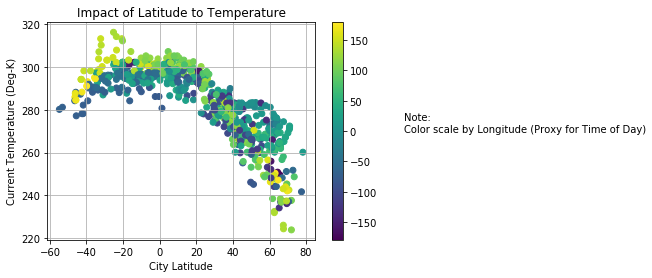

In [77]:
plt.scatter(weather_df["Latitude"], weather_df["MaxTemp"], c=weather_df["Longitude"])
plt.colorbar()
# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("Current Temperature (Deg-K)")
plt.title("Impact of Latitude to Temperature")
plt.grid(b=True, which="major", axis="both")
plt.figtext(0.95, 0.5, "Note:\nColor scale by Longitude (Proxy for Time of Day)")

#### Latitude vs. Humidity Plot

Text(0.95,0.5,'Note:\nColor scale by Longitude (Proxy for Time of Day)')

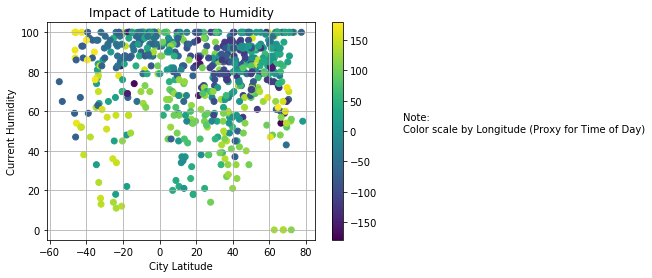

In [78]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], c=weather_df["Longitude"])
plt.colorbar()
# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("Current Humidity")
plt.title("Impact of Latitude to Humidity")
plt.grid(b=True, which="major", axis="both")
plt.figtext(0.95, 0.5, "Note:\nColor scale by Longitude (Proxy for Time of Day)")

#### Latitude vs. Cloudiness Plot

Text(0.95,0.5,'Note:\nColor scale by Longitude (Proxy for Time of Day)')

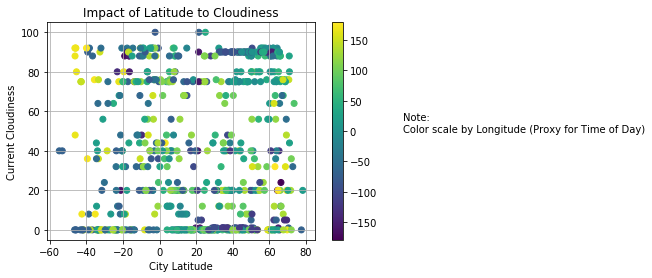

In [79]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], c=weather_df["Longitude"])
plt.colorbar()
# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("Current Cloudiness")
plt.title("Impact of Latitude to Cloudiness")
plt.grid(b=True, which="major", axis="both")
plt.figtext(0.95, 0.5, "Note:\nColor scale by Longitude (Proxy for Time of Day)")

#### Latitude vs. Wind Speed Plot

Text(0.95,0.5,'Note:\nColor scale by Longitude (Proxy for Time of Day)')

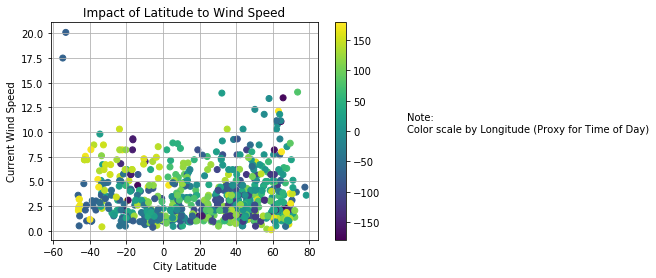

In [80]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], c=weather_df["Longitude"])
plt.colorbar()
# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("Current Wind Speed")
plt.title("Impact of Latitude to Wind Speed")
plt.grid(b=True, which="major", axis="both")
plt.figtext(0.95, 0.5, "Note:\nColor scale by Longitude (Proxy for Time of Day)")

# Thoughts and Conclusions
    1. The Openweather provides current weather conditions. There is an option for history, but even that data is not organized well to get actual maximum temperature of the day. So there is a time-of-day issue that needs to be considered, since collecting current weather around the world will be at different local time-of-day. Obviously time-of-day affects weather conditions, especially temperature. 
    2. The color scale provides visualization of similar longitudes, which can be used as a proxy for time-of-day. Really, any evaluation of temperature vs latitude should be only for roughly the same time-of-day. 
    3. The color scale also allows us to see that there is pretty good coverage of all longitudes as well as latitudes in this data set. 
    4. With this visualization capability, it is still clear that latitudes near 0 Deg (ie, near the equator) tend to have a higher temperature. This trend holds for all times-of-day. 
    5. The effect is more pronounced in the Northern hemisphere. That is likely because it is currently winter in the North. It is not proven here, but an evaluation of temperature variation throughout the year would probably show that temperatures near the equator vary less by month-of-year than temperatures in further from the equator. That suggests that it is likely that if this same analysis were done in July instead of January, the effect would be more pronounced in the Southern hemisphere. 
    6. Humidity and cloudiness do not appear to be affected by latitude. It would be more interesting to see if average humidity and cloudiness (over a year, probably) would correlate. 
    7. The wind speed data looks like it might have some shape. More analysis needed. 
